In [6]:
# Customer Segmentation for Marketing Strategy (K-Means Clustering)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [7]:
#GOAL: Group customers based on purchasing behavior

In [8]:
data = {
    'Annual_Spending($)': [500,1200,300,50,800,1500,200,1000,600,400,
                          2500,1800,2200,3000,2800,1900,3500,2400,3100,2700],
    'Visit_Frequency': [5,8,2,1,6,9,3,7,4,5,
                       15,12,18,20,14,11,25,16,22,19]
}
df=pd.DataFrame(data)

In [13]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

In [14]:
wcss=[]
for i in range(1,5):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

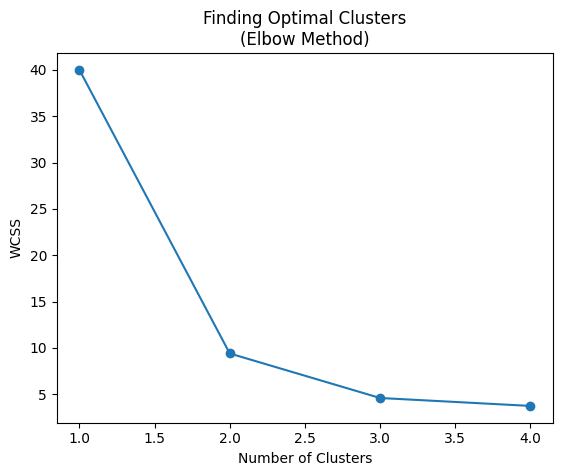

In [15]:
#finding k value using elbow method

plt.plot(range(1,5), wcss, marker='o')
plt.title('Finding Optimal Clusters\n(Elbow Method)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 
plt.show()

In [18]:
kmeans=KMeans(n_clusters=2,random_state=42)
df['Segment']=kmeans.fit_predict(scaled_data)

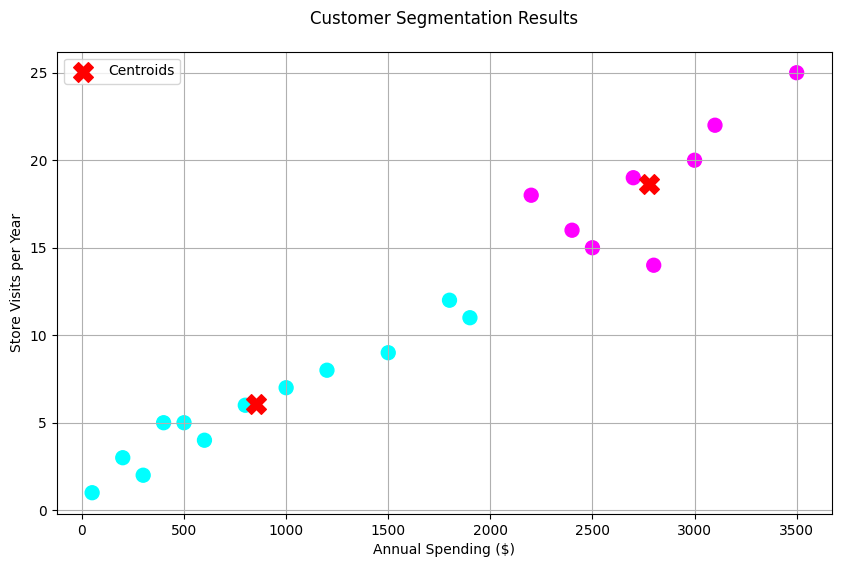

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual_Spending($)'], df['Visit_Frequency'],c=df['Segment'],cmap='cool',s=100)

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:,0], centers[:,1], 
    marker='X', 
    s=200, 
    c='red', 
    label='Centroids'
)

plt.title('Customer Segmentation Results', pad=20)
plt.xlabel('Annual Spending ($)')
plt.ylabel('Store Visits per Year')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
segment_profiles = df.groupby('Segment').mean()
print("\nSEGMENT PROFILES:")
print(segment_profiles)


SEGMENT PROFILES:
         Annual_Spending($)  Visit_Frequency
Segment                                     
0                854.166667         6.083333
1               2775.000000        18.625000
